In [ ]:
from torchvision.datasets import MNIST
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mnist_data_train = MNIST('/', train=True, download=True)
mnist_data_test = MNIST('/', train=False, download=True)

In [ ]:
## Pre-processing Data

# Putting data into correct variables
X_train, Y_train = mnist_data_train.data, mnist_data_train.targets
X_test, Y_test = mnist_data_test.data, mnist_data_test.targets

# Flattening the images into vectors
X_train, X_test = np.reshape(X_train, (X_train.shape[0], 28*28)), np.reshape(X_test, (X_test.shape[0], 28*28))

In [ ]:
## Question 1

# Select two classes (1 -> +1) and (7 -> -1). This is for train set
sample_indices_pos = np.where(Y_train == 1)[0]
sample_indices_neg = np.where(Y_train == 7)[0]
num = min(len(sample_indices_pos), len(sample_indices_neg))
X1, X2 = X_train[sample_indices_pos[:num]], X_train[sample_indices_neg[:num]]
Y1, Y2 = np.ones(num), np.ones(num)*-1
# Create one train dataset out of this
X_train, Y_train = np.concatenate((X1, X2), axis=0), np.concatenate([Y1, Y2])

# Select two classes (1 -> +1) and (7 -> -1). This is for test set
sample_indices_pos = np.where(Y_test == 1)[0]
sample_indices_neg = np.where(Y_test == 7)[0]
num = min(len(sample_indices_pos), len(sample_indices_neg))
X1, X2 = X_test[sample_indices_pos[:num]], X_test[sample_indices_neg[:num]]
Y1, Y2 = np.ones(num), np.ones(num)*-1
# Create one test dataset out of this
X_test, Y_test = np.concatenate((X1, X2), axis=0), np.concatenate([Y1, Y2])

# Whiten the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Adding a bias term to the feature matrix
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Least Squares solution function
def least_squares(X, Y):
    return np.linalg.pinv(X.T @ X) @ X.T @ Y

# Training the model using Least Squares
weights = least_squares(X_train_bias, Y_train.reshape(-1, 1))  # Ensure Y_train is a column vector

# Making predictions on the test set
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term to test set
Y_pred = np.sign(X_test_bias @ weights)

# Classification accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

NameError: name 'np' is not defined

accuracy score =  9.94


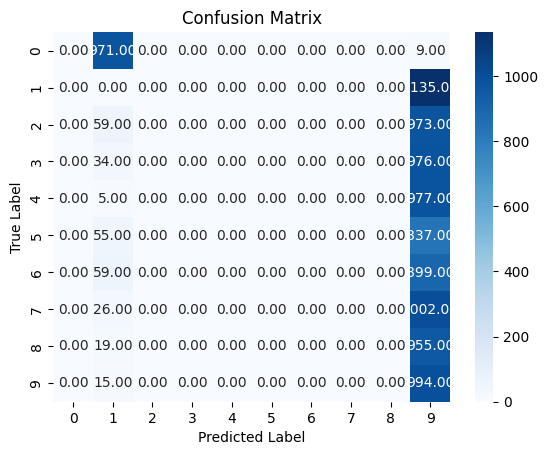

In [ ]:
## Question 2

X_train, Y_train = mnist_data_train.data, mnist_data_train.targets
X_test, Y_test = mnist_data_test.data, mnist_data_test.targets

# Flattening the images into vectors
X_train, X_test = np.reshape(X_train, (X_train.shape[0], 28*28)), np.reshape(X_test, (X_test.shape[0], 28*28))

weights_list = [] #list with weights_list[i] corresponding to weights obtained from ith model

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

for i in range(10):
  # for the train set
  sample_indices_pos = np.where(Y_train == i)[0]
  sample_indices_neg = np.where(Y_train != i)[0]
  X1, X2 = X_train[sample_indices_pos], X_train[sample_indices_neg[:len(sample_indices_pos)]]
  Y1, Y2 = np.ones(len(sample_indices_pos)), np.ones(len(sample_indices_pos))*-1

  X_train, Y_train = np.concatenate((X1, X2), axis=0), np.concatenate([Y1, Y2])

  X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

  # Training the model using Least Squares
  weights = least_squares(X_train_bias, Y_train.reshape(-1, 1))
  weights_list.append(weights)

  C = np.zeros((10,10))
correct = 0
total = 0
for i, X in enumerate(X_test_bias):
  pred=-1
  max_score = -np.inf
  # print(f'Actually {Y_test[i]}')
  for j in range(10):
    score = X@weights_list[j]
    # print(f'\tscore for {j}: {score}')
    if score >= max_score:
      max_score = score
      pred = j
  C[Y_test[i],pred] += 1

accuracy_score = 100*np.trace(C)/np.sum(C)
print("accuracy score = ", accuracy_score)
sns.heatmap(C, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
## Question 3

# Random vectors p and q
p = np.random.uniform(-10, 10, size=(100,))
q = np.random.uniform(-10, 10, size=(100,))

# Target variable b
b = np.where(p * q > 1, 1, -1)

# Basis functions
def f0(pi, qi):
    return np.ones_like(pi)

def f1(pi, qi):
    return pi

def f2(pi, qi):
    return qi

def f3(pi, qi):
    return pi**2

def f4(pi, qi):
    return qi**2

def f5(pi, qi):
    return pi * qi

# Matrix A
A = np.column_stack([f0(p, q), f1(p, q), f2(p, q), f3(p, q), f4(p, q), f5(p, q)])

# Using least squares to find the coefficient vector x
x = least_squares(A, b)

print("Coefficient vector x:")
print(x)


Coefficient vector x:
[-0.17212763  0.00405981  0.01175784  0.00085751  0.00092815  0.02338672]


In [ ]:
## Question 4

np.random.seed(42)

# Random vectors p and q
p = np.random.uniform(-1, 1, size=(100,))
q = np.random.uniform(-1, 1, size=(100,))

# Target variable b
b = p * q + p**2 + q**2

# Basis functions
def f0(pi, qi):
    return np.ones_like(pi)

def f1(pi, qi):
    return pi

def f2(pi, qi):
    return qi

def f3(pi, qi):
    return pi**2

def f4(pi, qi):
    return qi**2

def f5(pi, qi):
    return pi * qi

# Matrix A
A = np.column_stack([f0(p, q), f1(p, q), f2(p, q), f3(p, q), f4(p, q), f5(p, q)])

# Using least squares to find the coefficient vector x
x, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

# Mean Squared Error
mse = np.mean(residuals) / len(b)

print("Coefficient vector x:")
print(x)
print("Mean Squared Error (MSE):", mse)


Coefficient vector x:
[ 1.58654779e-16 -4.44089210e-16 -1.52655666e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
Mean Squared Error (MSE): 5.274892161788186e-32


In [ ]:
## Question 5 (a)

def generate_basis_functions(t, j, n):
    condition1 = (t >= (j - 1)/n) & (t <= (2*j - 1)/(2*n))
    condition2 = (t > (2*j - 1)/(2*n)) & (t <= j/n)
    return np.where(condition1, 2 * n * t - 2 * j + 2, np.where(condition2, -2 * n * t + 2 * j, 0))

def perform_least_squares(p, b, n):
    # Matrix A
    A = np.column_stack([generate_basis_functions(p, j, n) for j in range(1, n+1)])

    # Using least squares to find the coefficient vector x
    x, residuals, _, _ = np.linalg.lstsq(A, b, rcond=None)

    # Mean Squared Error
    mse = np.mean(residuals) / len(b)

    return x, mse

# For n = 10
n_10 = 10
p_10 = np.random.uniform(0, 1, size=(100,))
b_10 = 7 * p_10 - 3 * p_10**2
x_10, mse_10 = perform_least_squares(p_10, b_10, n_10)

# For n = 50
n_50 = 50
p_50 = np.random.uniform(0, 1, size=(100,))
b_50 = 7 * p_50 - 3 * p_50**2
x_50, mse_50 = perform_least_squares(p_50, b_50, n_50)

print(f"For n = {n_10}:")
print("Coefficient vector x:")
print(x_10)
print("Mean Squared Error (MSE):", mse_10)

print(f"\nFor n = {n_50}:")
print("Coefficient vector x:")
print(x_50)
print("Mean Squared Error (MSE):", mse_50)


For n = 10:
Coefficient vector x:
[0.57288226 1.52292325 2.6241855  3.38392121 4.4024019  4.51171726
 4.1182434  5.47007171 5.23413484 5.90907781]
Mean Squared Error (MSE): 2.312734509111644

For n = 50:
Coefficient vector x:
[2.27327348e-01 3.25636309e-01 4.99746744e-01 5.45748573e-01
 1.39047248e+00 2.57690791e+00 2.26825583e-15 2.86739795e+00
 1.99460783e+00 2.98307353e+00 5.07804223e-17 0.00000000e+00
 1.75787002e+00 1.84136985e+00 8.90358196e+00 1.88173571e+01
 6.58823097e+00 6.01321811e+00 3.16289344e+00 3.36353452e+00
 2.94129913e+00 3.32430607e+00 1.47545594e+01 4.26511071e+00
 3.23975687e+00 8.10944193e+00 3.32255266e+00 4.16955118e+00
 6.70553896e+00 5.31726562e+00 4.58517426e+00 4.94898481e+00
 1.24820018e+01 1.67892138e+02 9.77664023e+00 7.35890774e+00
 7.00764590e+00 4.52822026e+00 1.01098405e+01 7.62253547e+00
 6.55481993e+00 9.34175407e+00 9.28115640e+00 1.51600206e+01
 0.00000000e+00 7.24861647e+00 4.23727323e+00 9.43106612e+00
 1.23566904e+01 4.20252171e+00]
Mean Squar

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
## Question 5 (b)

from scipy.optimize import minimize

np.random.seed(42)

n_values = [150, 200]

# Function to generate basis functions
def generate_basis_functions(t, j, n):
    condition1 = (t >= (j - 1)/n) & (t <= (2*j - 1)/(2*n))
    condition2 = (t > (2*j - 1)/(2*n)) & (t <= j/n)
    return np.where(condition1, 2 * n * t - 2 * j + 2, np.where(condition2, -2 * n * t + 2 * j, 0))

# Function to perform least squares
def perform_least_squares(p, b, n):
    A = np.column_stack([generate_basis_functions(p, j, n) for j in range(1, n+1)])
    x, residuals, _, _ = np.linalg.lstsq(A, b, rcond=None)
    mse = np.mean(residuals) / len(b)

    return x, mse

# Function to calculate J1 and J2
def calculate_objectives(x, A, b, lambda_value):
    J1 = np.mean((b - A @ x)**2)
    J2 = np.linalg.norm(x)**2
    return J1 + lambda_value * J2

# Function to minimize the objective function
def minimize_objective(lambda_value, p, b, n):
    A = np.column_stack([generate_basis_functions(p, j, n) for j in range(1, n+1)])
    least_squares_result = minimize(calculate_objectives, x0=np.zeros(n), args=(A, b, lambda_value), method='L-BFGS-B')
    x = least_squares_result.x
    mse = least_squares_result.fun / len(b)
    return x, mse

# PMulti-objective least squares for different values of lambda
for n in n_values:
    p = np.random.uniform(0, 1, size=(100,))
    b = 7 * p - 3 * p**2

    print(f"\nFor n = {n}:")

    for _ in range(5):
        lambda_value = np.random.uniform(0, 0.2)
        x, mse = minimize_objective(lambda_value, p, b, n)

        print(f"\nLambda = {lambda_value}:")
        print("Coefficient vector x:")
        print(x)
        print("Mean Squared Error (MSE):", mse)



For n = 150:

Lambda = 0.006285837137346851:
Coefficient vector x:
[ 1.77395085e-02  0.00000000e+00  0.00000000e+00  1.13730790e-01
  0.00000000e+00  1.03028641e-01  1.88876492e-01  0.00000000e+00
  2.37639005e-01  3.56652781e-01  0.00000000e+00  3.61120892e-01
  0.00000000e+00  3.51511618e-01  4.09830247e-01  0.00000000e+00
  3.46643027e-01  5.58922699e-01  4.93797667e-01  0.00000000e+00
  2.13865400e-01  3.64322598e-01  0.00000000e+00  8.53519667e-01
  0.00000000e+00  6.96467844e-01  0.00000000e+00  1.12213848e+00
  0.00000000e+00  1.13805206e+00  0.00000000e+00  5.61683605e-01
 -1.73558129e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.73125410e-01  0.00000000e+00
  1.01650976e+00  0.00000000e+00  6.85800046e-01  1.52848531e+00
  0.00000000e+00  1.61936492e+00  1.65146256e+00  0.00000000e+00
  1.67865894e+00  1.24944493e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.69797931e+00  3.10228930e-01  0.00000000e+00
  1.04904505e+00  0.00

In [ ]:
## Question 6

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def linear_regression_fit(X, y):
    X = np.c_[np.ones(X.shape[0]), X]
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    intercept = coefficients[0]
    weights = coefficients[1:]

    return intercept, weights

def linear_regression_predict(X, intercept, weights):
    X = np.c_[np.ones(X.shape[0]), X]
    predictions = X @ np.hstack([intercept, weights])

    return predictions

file_path = './auto-regressive-data.csv'
df = pd.read_csv(file_path)

num_lags = 8
for i in range(1, num_lags + 1):
    df[f'lag_{i}_Consumption'] = df['Consumption'].shift(i)

df = df.dropna()

X = df.drop(['Date', 'Consumption', 'Wind+Solar'], axis=1)  # Excluding redundant columns
y = df['Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

intercept, weights = linear_regression_fit(X_train_scaled, y_train)

y_pred = linear_regression_predict(X_test_scaled, intercept, weights)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

new_data_point = X.iloc[-1, :].values.reshape(1, -1)
new_data_point_scaled = scaler.transform(new_data_point)
predicted_consumption = linear_regression_predict(new_data_point_scaled, intercept, weights)
print(f'Predicted Consumption for the next day: {predicted_consumption[0]}')


Mean Squared Error: 4775.744027578449
Predicted Consumption for the next day: 1138.9077205911908


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
## Question 7 (Incomplete)

from scipy.linalg import toeplitz
from scipy.signal import convolve2d
from scipy.sparse import diags

X = mnist_data_train.data[0].reshape(-1, 1)

# Gaussian blurring kernel
kernel = np.array([[1/16, 1/8, 1/16],
                   [1/8,  1/4,  1/8],
                   [1/16, 1/8, 1/16]])

# Toeplitz matrix of the kernel
A = toeplitz(kernel.flatten(), np.zeros((784,784)))
print(f'A shape: {A.shape}, X shape: {X.shape}')

I = np.eye(28)
Dh = np.kron(I, diags([-1, 1], [0, 1], shape=(28, 27)).toarray())
Dv = diags([-1, 1], [0, 1], shape=(27, 28)).toarray()

D = np.vstack([np.hstack([-np.eye(28), np.eye(28)]), np.hstack([np.zeros((28, 28)), -np.eye(28)])])

A shape: (9, 614656), X shape: torch.Size([784, 1])


In [ ]:
## Question 8

np.random.seed(42)

p = np.random.uniform(-1, 1, size=(100,))
q = np.random.uniform(-1, 1, size=(100,))

b = p * q + p**2 + q**2

def f0(pi, qi):
    return np.ones_like(pi)

def f1(pi, qi):
    return pi

def f2(pi, qi):
    return qi

def f3(pi, qi):
    return pi**2

def f4(pi, qi):
    return qi**2

def f5(pi, qi):
    return pi * qi

A = np.column_stack([f0(p, q), f1(p, q), f2(p, q), f3(p, q), f4(p, q), f5(p, q)])


def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)  # Initializing coefficients to zero

    for epoch in range(epochs):
        predictions = X.dot(theta)

        error = predictions - y

        # Updating coefficients
        for j in range(n):
            gradient = (1/m) * X[:, j].dot(error)
            theta[j] = theta[j] - learning_rate * gradient

    return theta

coefficients = gradient_descent(A, b)

print("Learned Coefficients:", coefficients)

Learned Coefficients: [ 0.30262505 -0.039119   -0.02320989  0.5950486   0.56972091  0.69970094]


Fitted Parameters:
f1(t): a1 = 1.0000006183743073, b1 = -3.0000006362017495, c1 = 4.000000100103326
f2(t): a2 = 2.9999441622085383, b2 = -1.999749455233937, c2 = -0.00036608669334864874, d2 = 1.0001740160069328
f3(t): a3 = 0.9999789509740127, b3 = 24.000104439206662, c3 = -35.000127804995216


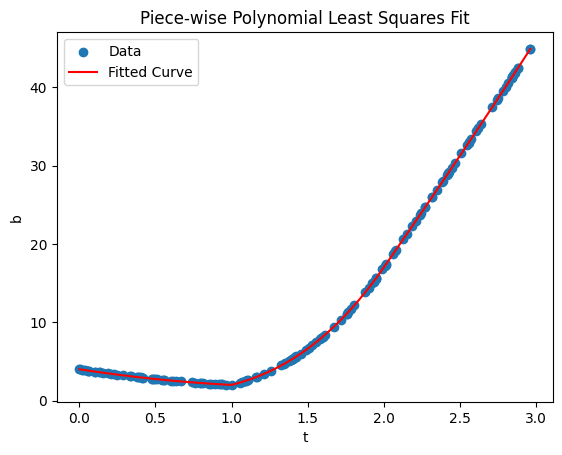

In [ ]:
# Question 9

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("assignment9_data.csv")
t_data = df['t'].values
b_data = df['b'].values

# Piece-Wise Functions
def f1(t, a1, b1, c1):
    return a1 * t**2 + b1 * t + c1

def f2(t, a2, b2, c2, d2):
    return a2 * t**3 + b2 * t**2 + c2 * t + d2

def f3(t, a3, b3, c3):
    return a3 * t**2 + b3 * t + c3

def combined_function(t, a1, b1, c1, a2, b2, c2, d2, a3, b3, c3):
    return np.piecewise(t, [t <= 1, (t > 1) & (t <= 2), t > 2],
                        [lambda t: f1(t, a1, b1, c1),
                         lambda t: f2(t, a2, b2, c2, d2),
                         lambda t: f3(t, a3, b3, c3)])

def cost_function(params, t, b):
    return np.sum((combined_function(t, *params) - b)**2)

initial_guess = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

result = minimize(cost_function, initial_guess, args=(t_data, b_data))

params = result.x
a1, b1, c1, a2, b2, c2, d2, a3, b3, c3 = params

print("Fitted Parameters:")
print("f1(t): a1 = {}, b1 = {}, c1 = {}".format(a1, b1, c1))
print("f2(t): a2 = {}, b2 = {}, c2 = {}, d2 = {}".format(a2, b2, c2, d2))
print("f3(t): a3 = {}, b3 = {}, c3 = {}".format(a3, b3, c3))

t_range = np.linspace(min(t_data), max(t_data), 1000)
plt.scatter(t_data, b_data, label='Data')
plt.plot(t_range, combined_function(t_range, *params), label='Fitted Curve', color='red')
plt.legend()
plt.xlabel('t')
plt.ylabel('b')
plt.title('Piece-wise Polynomial Least Squares Fit')
plt.show()
